In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
dark = sns.color_palette('dark')
bright = sns.color_palette('bright')
deep = sns.color_palette('deep')
pastel = sns.color_palette('pastel')

plt.style.use("seaborn-dark")

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('../input/insurance-premium-prediction/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
df.shape

(1338, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

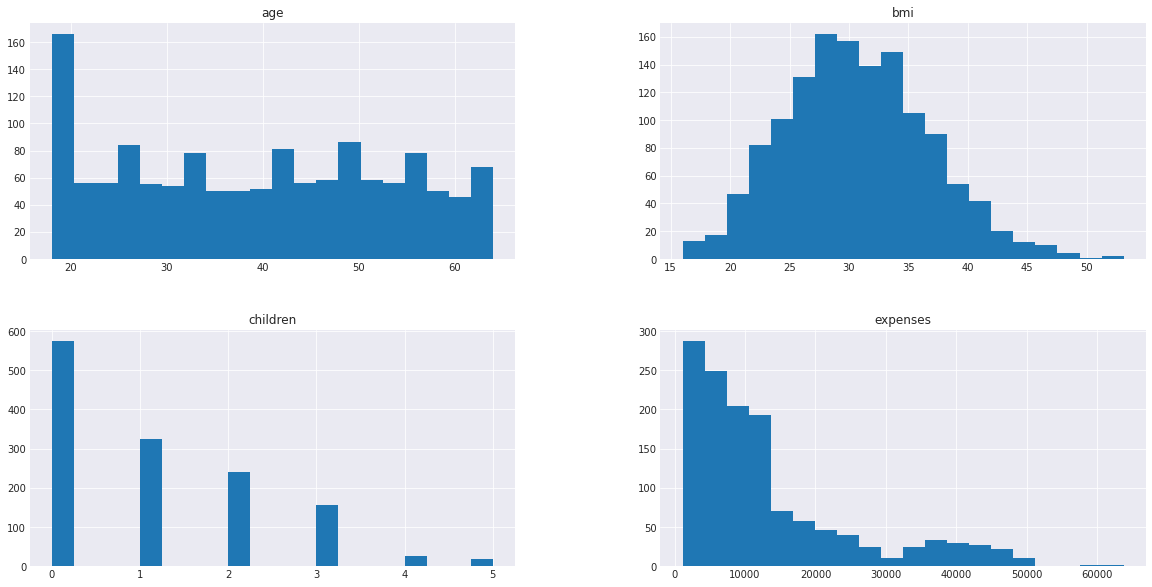

In [16]:
df.hist(bins=20,figsize=(20,10));

In [17]:
categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O']
categorical_columns

['sex', 'smoker', 'region']

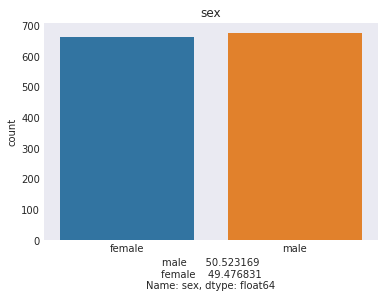

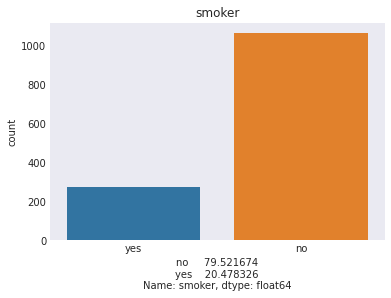

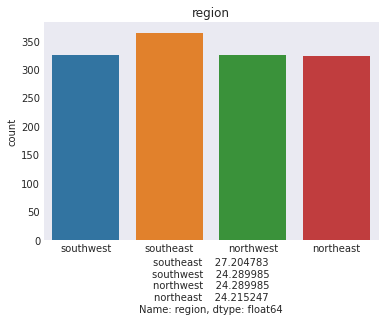

In [18]:
for col in categorical_columns:
    sns.countplot(col,data=df)
    labels = (df[col].value_counts() / len(df))*100
    plt.title(col)
    plt.xlabel(f'{labels}')
    plt.show()

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

<AxesSubplot:xlabel='age'>

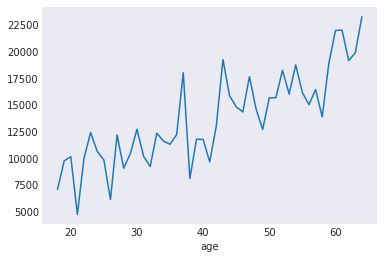

In [21]:
df.groupby('age')['expenses'].mean().plot()

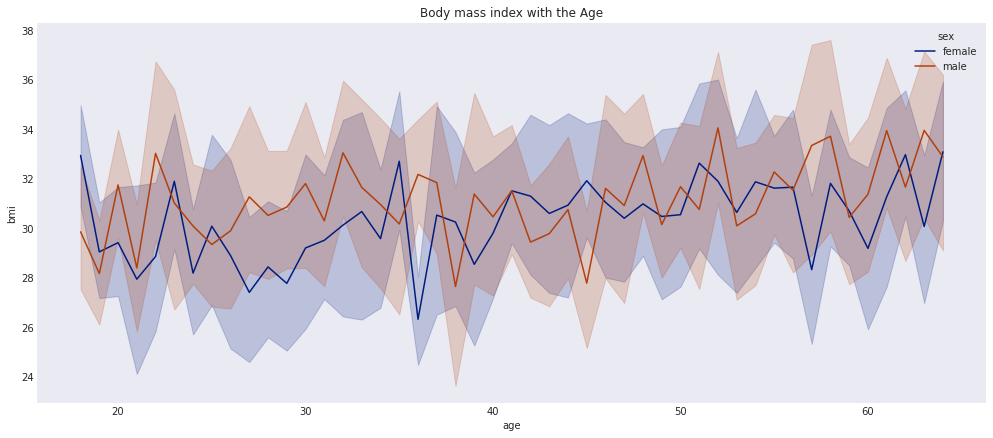

In [22]:
## Age vs BMI
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex",palette='dark')
plt.title("Body mass index with the Age")
plt.show()

<AxesSubplot:xlabel='sex'>

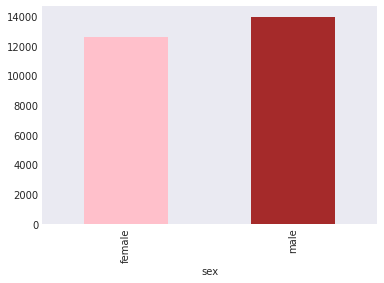

In [24]:
temp = df.groupby('sex')['expenses'].mean()
temp.plot(kind='bar',color=['pink','brown'])

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

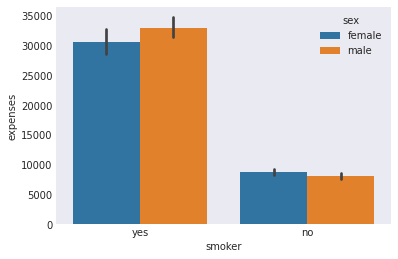

In [25]:
sns.barplot(data=df,x='smoker',y='expenses',hue='sex')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

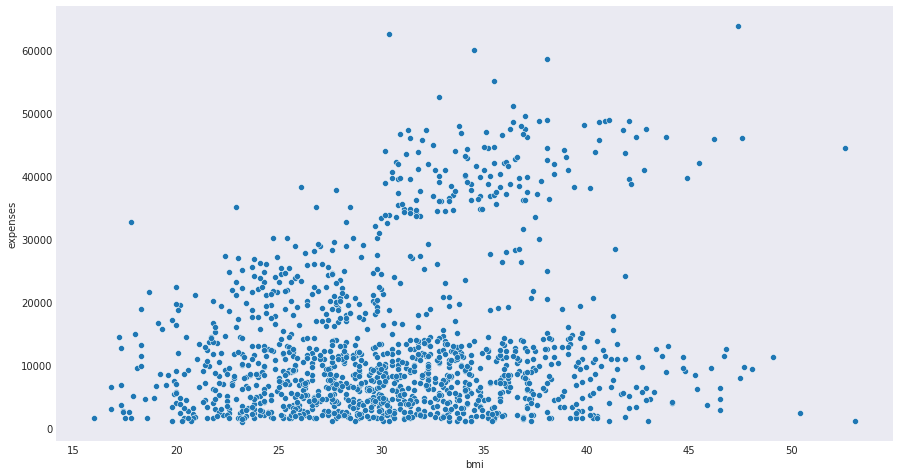

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='bmi',y='expenses')

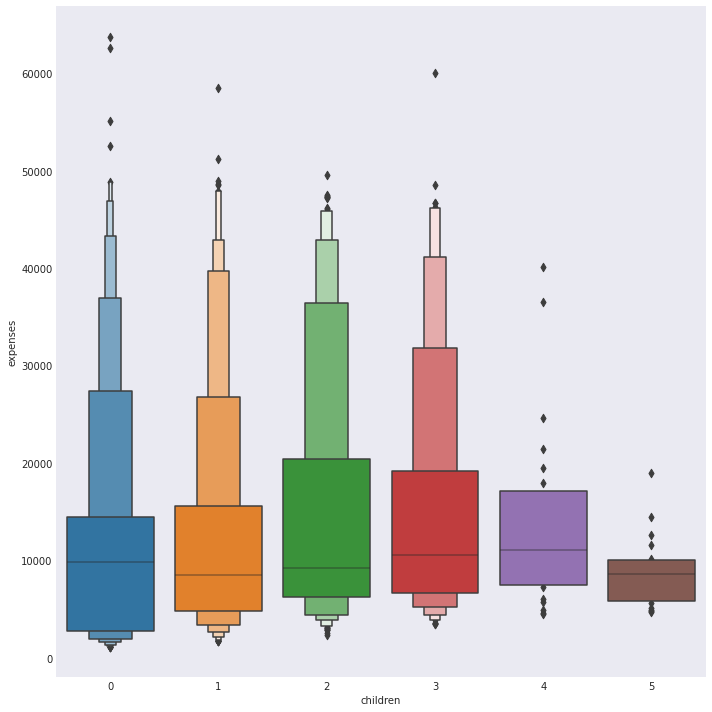

In [27]:
sns.catplot(x="children", y="expenses",kind="boxen", data=df,height=10)

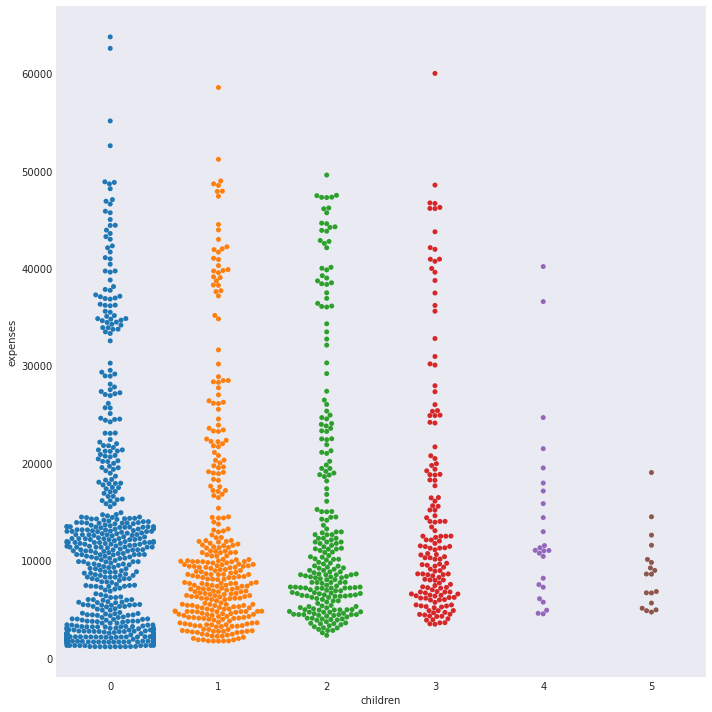

In [28]:
sns.catplot(x="children", y="expenses",kind="swarm", data=df,height=10)

<AxesSubplot:xlabel='region', ylabel='count'>

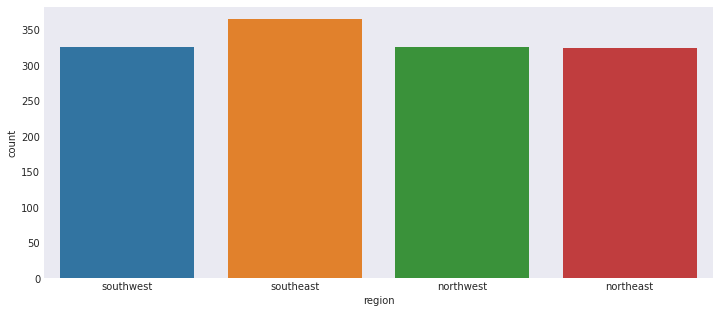

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='region')
# ax = sns.countplot(data=df,x='region')
# ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='region', ylabel='expenses'>

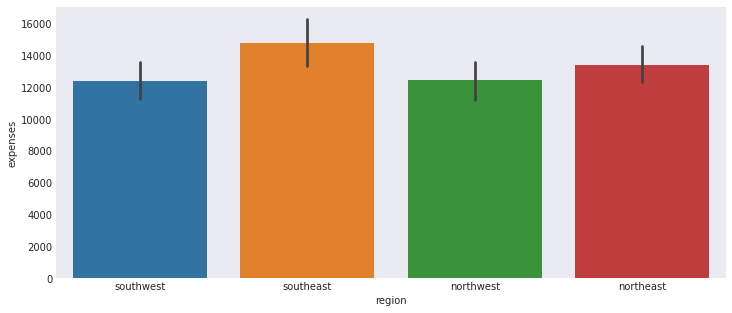

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='region',y='expenses')

<AxesSubplot:xlabel='region', ylabel='expenses'>

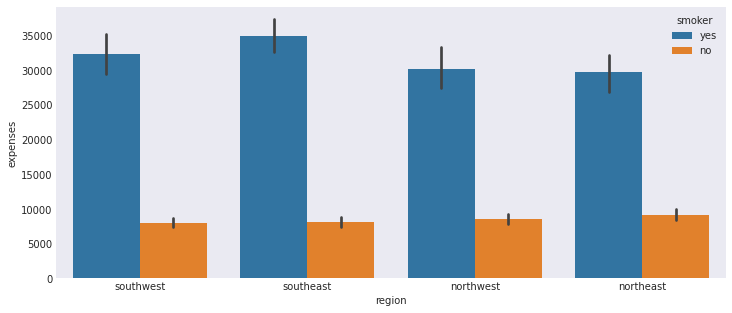

In [31]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='region',y='expenses',hue='smoker')

Text(0.5, 1.0, 'Regions With Oldest People')

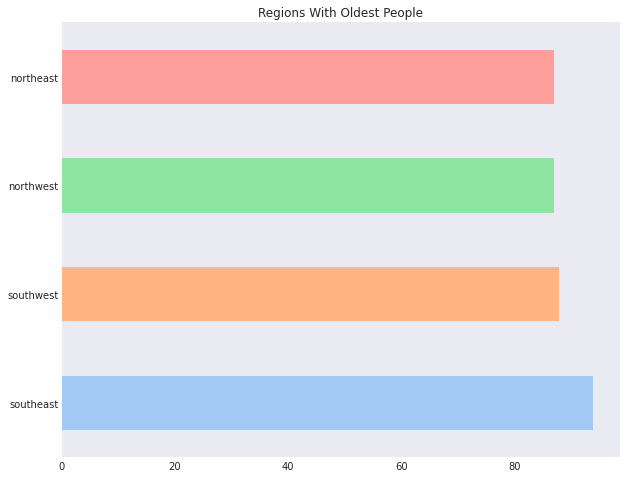

In [32]:
df[df['age']>50]['region'].value_counts().plot.barh(color=pastel,figsize=(10,8))
plt.title('Regions With Oldest People')

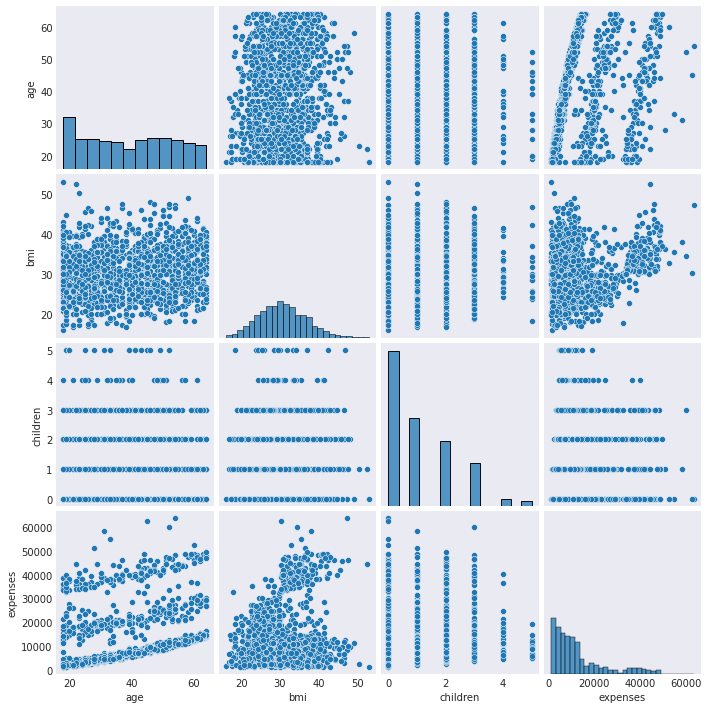

In [33]:
sns.pairplot(df,palette='pastel')

In [35]:
## Making a Group 
a=df.groupby(["sex","smoker","region"])["expenses"].mean().round(2)
a

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8320.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: expenses, dtype: float64

<AxesSubplot:xlabel='sex,smoker,region'>

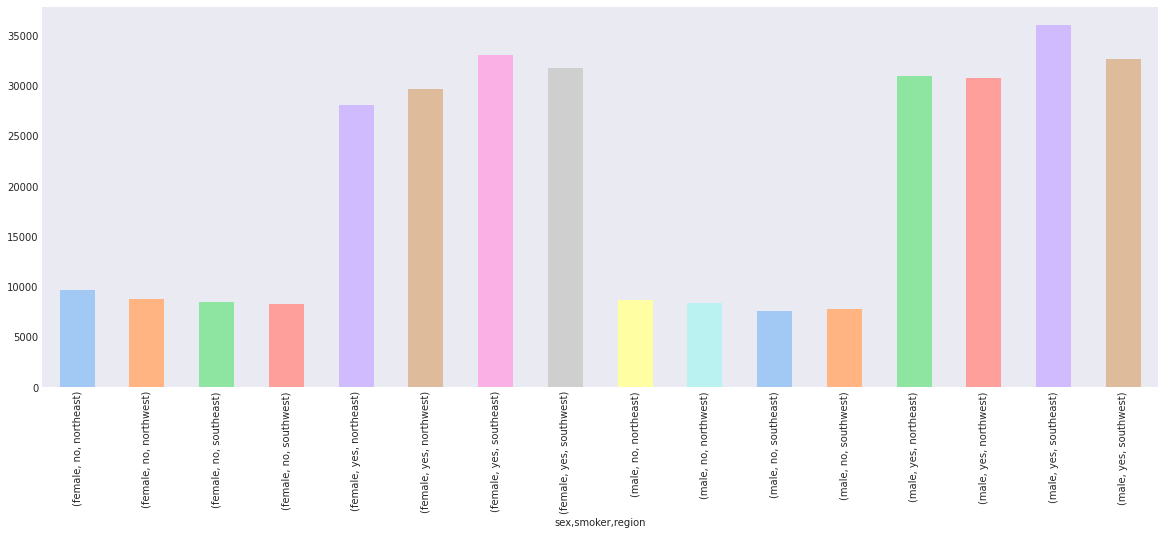

In [36]:
a.plot(kind="bar", figsize=(20,7),color=pastel)

In [37]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [38]:
plt.figure(figsize=(17,7))
px.scatter(data_frame=df,
           x='bmi', 
           y='expenses',
           color="sex",
           size="children",
           symbol='smoker',
           hover_name='region',
           text='age',
           title='Group Information Of Insurance Data On Different Scatter Points')

<Figure size 1224x504 with 0 Axes>

In [39]:
## Handling Categorical Data
categorical_columns

['sex', 'smoker', 'region']

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [45]:
## Data splitting
X = df.drop('expenses',axis=1)
y = np.log(df['expenses'])

In [47]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [48]:
y.head()

0    9.734176
1    7.453301
2    8.400538
3    9.998092
4    8.260198
Name: expenses, dtype: float64

In [49]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
X_train.shape

(1003, 6)

In [51]:
X_test.shape

(335, 6)

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score

In [54]:
from sklearn.linear_model import LinearRegression  

linreg=LinearRegression()
linreg.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", linreg.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", linreg.score(X_test,y_test))

y_pred = linreg.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.7634855955709812
Score the X-test  with Y-test  is :  0.7766655915264574
MAE:  0.2746089369417558


In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", ridge.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", ridge.score(X_test,y_test))

y_pred = ridge.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.7634683365713538
Score the X-test  with Y-test  is :  0.7765529927869056
MAE:  0.27529388494837376


In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42)
lasso.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", lasso.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", lasso.score(X_test,y_test))

y_pred = lasso.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.26673378073924814
Score the X-test  with Y-test  is :  0.284940207267122
MAE:  0.6338892591051163


In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mse',splitter='best',random_state=42)
dtr.fit(X_train,y_train)


print("Score the X-train with Y-train is : ", dtr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", dtr.score(X_test,y_test))

y_pred = dtr.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.9969342514435011
Score the X-test  with Y-test  is :  0.6851162557653614
MAE:  0.23381312439673904


In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)


print("Score the X-train with Y-train is : ", rfr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", rfr.score(X_test,y_test))

y_pred = rfr.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.9720774035036289
Score the X-test  with Y-test  is :  0.8160203693316997
MAE:  0.1927621215785227


In [59]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=100,random_state=42)
etr.fit(X_train,y_train)


print("Score the X-train with Y-train is : ", etr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", etr.score(X_test,y_test))

y_pred =etr.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.9969342514435011
Score the X-test  with Y-test  is :  0.8031241337902344
MAE:  0.18682450612625676


In [60]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=42)
abr.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", abr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", abr.score(X_test,y_test))

y_pred = abr.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.7468749830490471
Score the X-test  with Y-test  is :  0.7211919691211588
MAE:  0.3703084410112988


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", gbr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", gbr.score(X_test,y_test))

y_pred = gbr.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))


Score the X-train with Y-train is :  0.8874454109095519
Score the X-test  with Y-test  is :  0.8339049587989202
MAE:  0.1896554257344409


In [62]:
from xgboost import XGBRegressor
xgb=XGBRegressor(random_state=42)

xgb.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", xgb.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", xgb.score(X_test,y_test))

y_pred = xgb.predict(X_test)
print("MAE: " ,mean_absolute_error(y_test,y_pred))

Score the X-train with Y-train is :  0.9920670154236506
Score the X-test  with Y-test  is :  0.795711305447951
MAE:  0.21171966900115055


In [64]:
import pickle 
pickle.dump(gbr, open('gbr-model', 'wb'))

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate':[0.5,0.10,0.01,0.1],
             'n_estimators':[25,50,75,100,125],
              'max_depth':[5,7,9,10],
              'subsample':[1,2],
              'min_samples_split':[1,2,3],
              'min_samples_leaf':[1,1.5,2],
              'max_depth':[5,7,9,10]
              
             }

g_search = GridSearchCV(estimator = gbr, param_grid = param_grid,cv = 3, n_jobs = 1,verbose = True, return_train_score=True)
g_search.fit(X_train, y_train);

print(g_search.best_params_)
print(g_search.score(X_test, y_test))

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25, 'subsample': 1}
0.8284443409031609


<AxesSubplot:xlabel='expenses'>

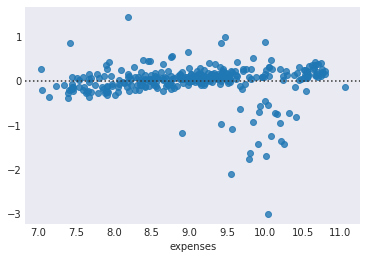

In [66]:
sns.residplot(y_test,y_pred)

In [67]:
y_pred = g_search.predict(X_test)
print("R2 Score Gradient Boost Regressor" ,r2_score(y_test,y_pred))

R2 Score Gradient Boost Regressor 0.8284443409031609


In [68]:
import pickle 
pickle.dump(g_search, open('model.pkl', 'wb'))

In [69]:
loaded_model = pickle.load(open("model.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8284443409031609

In [70]:
age = int(input("Enter Your Age \n"))
sex = int(input("What's Your Gender(1:Male 0:Female) \n"))
bmi = float(input("Enter Your Body Mass Index \n"))
children = int(input("How Many Childrens Your Have (If None Enter 0) \n"))
smoker = int(input("Do You Smoke? (1: Yes 0:No) \n"))
region = int(input("What's You Region(northeast:0,northwest:1,southeast:2,southwest:3) \n"))

data = [age,sex,bmi,children,smoker,region]
new_data = pd.DataFrame([data],columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
prediction = loaded_model.predict(new_data)
print(np.exp(prediction[0]))

Enter Your Age 
 61
What's Your Gender(1:Male 0:Female) 
 1
Enter Your Body Mass Index 
 34
How Many Childrens Your Have (If None Enter 0) 
 2
Do You Smoke? (1: Yes 0:No) 
 1
What's You Region(northeast:0,northwest:1,southeast:2,southwest:3) 
 2


41614.326916402984


In [71]:
age = int(input("Enter Your Age \n"))
sex = int(input("What's Your Gender(1:Male 0:Female) \n"))
bmi = float(input("Enter Your Body Mass Index \n"))
children = int(input("How Many Childrens Your Have (If None Enter 0) \n"))
smoker = int(input("Do You Smoke? (1: Yes 0:No) \n"))
region = int(input("What's You Region(northeast:0,northwest:1,southeast:2,southwest:3) \n"))

data = [age,sex,bmi,children,smoker,region]
new_data = pd.DataFrame([data],columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
prediction = loaded_model.predict(new_data)
print(np.exp(prediction[0]))

Enter Your Age 
 19
What's Your Gender(1:Male 0:Female) 
 0
Enter Your Body Mass Index 
 23
How Many Childrens Your Have (If None Enter 0) 
 0
Do You Smoke? (1: Yes 0:No) 
 0
What's You Region(northeast:0,northwest:1,southeast:2,southwest:3) 
 3


2082.275539133097
